In [1]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Bertrand Competition

Another model we consider is **Bertrand competition**, named for Joseph Louis Francois Bertrand, that is similar to Cournot competition but that firms compete using _prices_ rather than quantity. Under the assumptions of this model, consumers want to buy everything at the lowest price, and if the price is the same then demand is evenly split between those producers. One fundamental assumption is that all firms have the same unit cost of production, which means that as long as the price the firm sets is above the unit cost, it is willing to supply any amount that is demanded. 

An example of a Bertrand oligopoly comes form the soft drink industry: Coke and Pepsi (which form a **duopoly**, a market with only two participants). Both firms compete by changing their prices based on a function that takes into account the price charged by their competitor. This model predicts that even this small competition will result in prices being reduced to the marginal cost level, the same outcome as perfect competition.

## Bertrand Equilibrium

To find the Bertrand equilibrium, let $c$ be the (constant) marginal cost, $p_1$ be firm 1's price level, $p_2$ be firm 2's price level, and $p_m$ be the monopoly price level. Firm 1's price depends on what it believes firm 2 will set its prices to be. Because consumers always buy at the lowest price and the firm will fulfill any level of demand, pricing just below firm 2 will obtain full market demand for firm 1. Why might this not be a good idea? If firm 2 is pricing below the level of marginal cost, then firm 1 will incur losses because they would need to sell at a price lower than the cost of production. 

Let $p'_1(p_2)$ be firm 1's optimal price based on price $p_2$ set by firm 2. The graph below shows $p'_1(p_2)$. Note that when $p_2 < c$, $p'_1$ is equal to $c$, that $p'_1$ rises linearly along but _just below_ the line $y=x$ with $p_2$ until $p_2$ reaches $p_m$, and that it then levels off at $p_m$. In this way, firm 1's price stays below firm 2's price when it is not operating at a loss and does not exceed $p_m$.

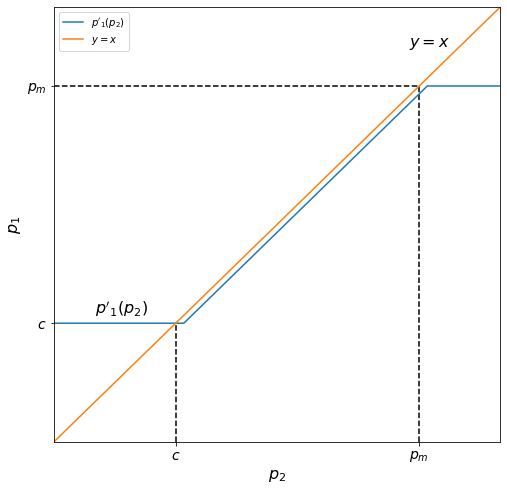

In [2]:
p_m = 18
c = 6
dist = 0.4 # the distance from y = x to p'_1(p_2)

xs1 = np.linspace(0, c, 100)
ys1 = c * np.ones_like(xs1)

xs2 = np.linspace(c + dist, p_m + dist, 100)
ys2 = xs2.copy() - dist

xs3 = np.linspace(p_m + dist, 25, 100)
ys3 = p_m * np.ones_like(xs3)

xs = np.append(np.append(xs1, xs2), xs3)
ys = np.append(np.append(ys1, ys2), ys3)

plt.figure(figsize=[8,8])

plt.plot(xs, ys, label=r"$p'_1(p_2)$")

y_equals_x_xs = np.linspace(0, 25, 100)
y_equals_x_ys = y_equals_x_xs.copy()

plt.plot(y_equals_x_xs, y_equals_x_ys, label=r"$y=x$")

plt.vlines(c, 0, c, linestyle="dashed")
plt.vlines(p_m, 0, p_m, linestyle="dashed")
plt.hlines(p_m, 0, p_m, linestyle="dashed")

plt.text(2, 6.5, r"$p'_1(p_2)$", size=16)
plt.text(17.5, 20, r"$y=x$", size=16)

plt.xlim([0,22])
plt.ylim([0,22])
plt.xlabel(r"$p_2$", size=16)
plt.ylabel(r"$p_1$", size=16)
plt.xticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.yticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.legend();

Because firm 2 has the same marginal cost $c$ as firm 1, its reaction function $p'_2(p_1)$ is symmetrical to firm 1's about the line $y=x$:

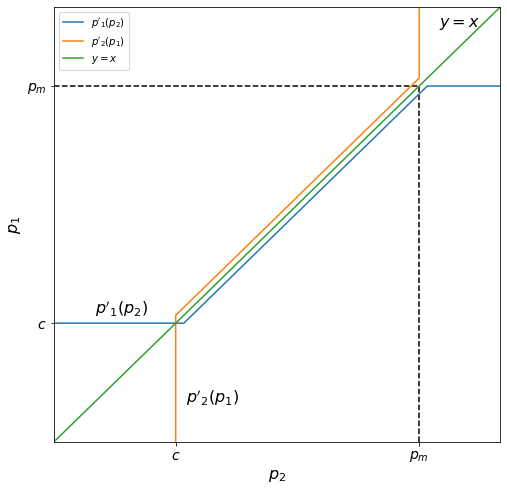

In [3]:
p_m = 18
c = 6
dist = 0.4 # the distance from y = x to p'_1(p_2)

xs1 = np.linspace(0, c, 100)
ys1 = c * np.ones_like(xs1)

xs2 = np.linspace(c + dist, p_m + dist, 100)
ys2 = xs2.copy() - dist

xs3 = np.linspace(p_m + dist, 25, 100)
ys3 = p_m * np.ones_like(xs3)

xs_1 = np.append(np.append(xs1, xs2), xs3)
ys_1 = np.append(np.append(ys1, ys2), ys3)

ys1 = np.linspace(0, c, 100)
xs1 = c * np.ones_like(xs1)

ys2 = np.linspace(c + dist, p_m + dist, 100)
xs2 = xs2.copy() - dist

ys3 = np.linspace(p_m + dist, 25, 100)
xs3 = p_m * np.ones_like(xs3)

xs_2 = np.append(np.append(xs1, xs2), xs3)
ys_2 = np.append(np.append(ys1, ys2), ys3)

plt.figure(figsize=[8,8])

plt.plot(xs_1, ys_1, label=r"$p'_1(p_2)$")
plt.plot(xs_2, ys_2, label=r"$p'_2(p_1)$")

y_equals_x_xs = np.linspace(0, 25, 100)
y_equals_x_ys = y_equals_x_xs.copy()

plt.plot(y_equals_x_xs, y_equals_x_ys, label=r"$y=x$")

plt.vlines(p_m, 0, p_m, linestyle="dashed")
plt.hlines(p_m, 0, p_m, linestyle="dashed")

plt.text(2, 6.5, r"$p'_1(p_2)$", size=16)
plt.text(6.5, 2, r"$p'_2(p_1)$", size=16)
plt.text(19, 21, r"$y=x$", size=16)

plt.xlim([0,22])
plt.ylim([0,22])
plt.xlabel(r"$p_2$", size=16)
plt.ylabel(r"$p_1$", size=16)
plt.xticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.yticks([c, p_m], [r"$c$", r"$p_m$"], size=14)
plt.legend();

These two strategies form a Nash equilibrium because neither firm can increase profits by changing their own strategy unilaterally. The equilibrium occurs where $p_1 = p'_1(p_2)$ and $p_2 = p'_2(p_1)$, at the intersection of the two reaction curves. Notably, this means that the Bertrand equilibrium occurs when both firms are producting _at marginal cost_. 

This makes intuitive sense: say that the two firms both set equal prices at a price above $c$ where they split demand equally. Then both firms have incentive to reduce their price slightly and take the other half of the market share from their competitor. Thus, both firms are tempted to lower prices as much as possible, but lowering below the level of marginal cost makes no sense because then they're operating at a loss. Thus, both firms sell at the price level $c$.

## Implications

The Bertrand model implies that even a duopoly in a market is enough to push prices down to the level of perfect competition. It does, however, rely on some serious assumptions. For example, there are many reasons why consumers might not buy the lowest-priced item (e.g. non-price competition, search costs). When these factors are included in the Bertrand model, the same result is no longer reached. It also ignores the fact that firms may not be able to supply the entire market demand; include these capacity constraints in the model can result in the system having no Nash equilibrium. Lastly, the Bertrand model demonstrates big incentives to cooperate and raise prices to the monopoly level; however, this state is not a Nash equilibrium, and in fact, the only Nash equilibrium of this model is the non-cooperative one with prices at marginal cost.